# How Autoencoders Work: Intro and UsesCases by Shivam Bansal - First Try

본 노트북은 중간부터 Subinium님의 해석본을 참고하였습니다. 해석본을 만들어주신 Subinium님께 감사드립니다.

> https://www.kaggle.com/subinium/how-autoencoders-work-korean-ver

## 1. Introduction

### 1.1. What are Autoencoders
오토인코더(Autoencoder)는 특별한 종류의 신경망 구조로 출력이 입력과 같다. 오토인코더는 비지도로 학습되는데 이는 입력 데이터의 극도로 낮은 수준의 표현을 배우기 위해서이다. 이 낮은 수준의 피처들은 실제 데이터로 투영시키기 위해 다시 변형된다. 오토인코더는 회귀 작업으로 여기서 신경망은 그것의 입력을 예측하도록 요청받는다. (즉, 항등 함수를 모델링하도록) 이 신경망은 중간에 몇 개의 뉴런으로 구성되어 매우 좁은 보틀넥(bottleneck)을 가지고 있으며, 이는 디코더가 원래의 입력을 재현하기 위해 사용하는 저차원 코드로 입력을 압축하는 효과적인 표현을 만들 수 밖에 없다.

일반적인 오토인코더의 구조는 3가지 주요 부품으로 구성되어 있다:
* `Encoding Architecture` : 인코더의 구조는 노드 수가 감소하는 일련의 계층으로 구성되어 있으며 궁극적으로 `Latent View Representation` 으로 감소된다.
* `Latent View Representation` : 잠재적 뷰는 가장 낮은 수준의 공간을 의미하는데 여기서는 입력이 감소되고 정보가 보존되어 있다.
* `Decoding Architechture` : 디코딩 구조는 인코딩 구조와 대칭되지만, 모든 계층의 노드 수가 증가하여 궁극적으로 거의 입력과 유사한 출력을 낸다.

![autoencoder-architecture](../img/autoencoder-architecture.png)

고도로 미세 조정된(highly fine tuned) 오토인코더 모델은 첫 번째 계층에서 전달된 동일한 입력을 재구성할 수 있어야 한다. 이 커널에선느 오토인코더의 작업과 그 구현에 대해 설명할 것이다. 오토인코더는 이미지 데이터와 함계 광범위하게 사용되며, 그 사용 사례 중 일부는 다음과 같다.

* 차원 축소 (Dimentionality Reduction)
* 이미지 압축 (Image Compression)
* 이미지 노이즈 제거 (Image Denoising)
* 이미지 생성 (Image Generation)
* 피처 추출 (Feature Extraction)

### 1.2. How Autoencoders work
오토인코더 뒤에 숨겨진 수학을 이해해보자. 오토인코더 이면의 주요 아이디어는 고차원 데이터의 낮은 수준의 표현을 배우는 것이다. 예를 들면 데이터 표현 공간(데이터를 나타내는 데 사용되는 N차원 공간)을 고려하고 `x1`과 `x2`의 두 변수로 표현되는 데이터 점을 고려해보자. 데이터의 매니폴드는 실제 데이터가 있는 표현 공간 내부의 공간이다.

> 매니폴드 러닝은 고차원 데이터를 쭉 뿌려서보면 점들이 이리저리 흝어져 있을텐데 그 점들을 에러 없이 잘 아우를 수 있는 서브 스페이스가 있을 것이라고 생각매하여 그 공간을 찾는 것이다. 그리고 그렇게 찾은 공간을 활용하여 데이터 차원을 축소시킬 수 있을 것을 기대한다.

![autoencoder-work-1](../img/autoencoder-work-1.png)

데이터를 표현하기 위해 우리는 X, Y축 즉 2개의 차원을 사용한다. 하지만 이 공간의 차원을 1차원과 같은 낮은 차원으로 축소할 수 있다. 우리가 다음과 같이 정의한다고 할 때:
* 선의 기준점: A
* 수평축과의 각도 L

다른 어떤 점 B는 A로부터의 거리 d와 각도 L로 나타낼 수 있다.

![autoencoder-work-2](../img/autoencoder-work-2.png)

![autoencoder-work-3](../img/autoencoder-work-3.png)

하지만 여기서 중요한 질문은 A와 각도 L의 관점에서 어떤 논리나 규칙, 즉 B점을 나타낼 수 있느냐는 것이다. 또는 다른 용어로 B, A, L 사이의 방정식은 무엇이냐는 것이다. 정답은 간단하다. 정해진 방정식은 없지만, 가장 좋은 방정식은 비지도 학습 과정을 통해 얻어진다. 간단히 말해서, 학습 과정은 A와 L의 형태로 B를 변환하는 규칙/방정식으로 정의도리 수 있다. 오토인코더의 관점에서 이 과정을 이해해보자.

은닉층이 없는 오토인코더를 고려할 때, 입력 x1과 x2는 더 낮은 표현 d로 인코딩되는데 이 d는 더 높은 차원의 x1과 x2에서 투영된 것이다.

![autoencoder-represent](../img/autoencoder-represent.png)

#### Step 1: Represent the points in Latent View Space
데이터 표현 공간에서의 점 A와 B의 좌표가 다음과 같다면:
* 점 A: (x1A, x2A)
* 점 B: (x1B, x2B)

잠재 공간에서는 다음과 같이 표현된다.
* (x1A, x2A) -> (0, 0)
* (x1B, x2B) -> (u1B, u2B)

u1B와 u2B는 다음과 같이 기준점과의 거리로 표현할 수 있다.
* u1B = x1B - x1A
* u2B = x2B - x2A

#### Step 2: Represent the points with distance d and angle L
u1B와 u2B는 거리 d와 각도 L로 표현될 수 있다. 각도 L만큼 기존 축으로 회전한다면 L은 0이 될 것이다.

* (d, L) -> (d, 0)

이제 이 데이터가 인코디 과정의 출력이 되고, 데이터를 낮은 차원으로 표현한다. 우리가 모든 계층의 가중치와 편향(bias)의 신경망의 기본 방정식을 생각하면 다음과 같은 과정이 인코딩이라고 생각할 수 있다.

* (d, 0) = W. (u1B, u2B) -> (encoding)

W는 은닉층의 가중치 행렬이다. 이후 디코딩 과정은 인코딩 과정을 반대로 생각하면 된다.

* (u1B, u2B) = Inverse (W) . (d, 0) -> (decoding)

(x1, x2)의 (차원) 축소된 형태는 인코딩 구조에서 얻은 잠재 공간에서의 (d, 0)이다. 마찬가지로 디코딩 구조는 이 표현을 원래의 형태 (u1B, u2B)로 변환한 다음 (x1, x2)로 변환한다. 중요한 점은 데이터의 우형에 따라 규칙 / 학습 함수 / 인코딩-디코딩 방정식이 다르다는 것이다. 예를 들어, 2차원 공간에서의 다음 데이터를 생각해봐라.

### 1.3. Different Rules for Different data
모든 유형의 데이터에 똑같은 규칙이 적용되는 것은 아니다. 예를 들어 앞의 데이터에서는 1차원 선형 데이터 매니폴드에 투영하여 각도 L을 없앴다. 하지만 정확하게 투영 불가능한 데이터의 경우는 어떨까?

예를 들어 다음 데이터를 보자.

![cant-project](../img/cant-project.png)

이런 유형의 데이터의 문제점은 투영을 함과 동시에 데이터에 대한 손실을 복구할 수 없다는 점이다. 아무리 많은 이동과 회전을 해도 원본으로 복구할 수 없다.

그렇다면 신경망은 이 문제를 어떻게 해결을 할까? 심층 신경망(deep neural network)는 선형 데이터를 만들기 위해 공간을 구부릴 수 있다. 그렇기에 오토인코더는 이런 은닉층의 기능을 활용하여 저차원 표현을 학습할 수 있다.

![fold-space](../img/fold-space.png)

이제 케라스를 사용하여 오토인코더를 구현해보자.

## 2. Implementation

### 2.1. UseCase 1: Image Reconstruction
#### 2.1.1. Imports

In [1]:
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

#### 2.1.2. Dataset Preparation
데이터셋을 불러오고 예측변수(predictor)과 타겟을 분리하고 입력 데이터를 정규화한다.

In [2]:
# 데이터 로드
train = pd.read_csv('../data/fashion-mnist_train.csv')
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

In [3]:
train_x.shape

(60000, 784)

In [4]:
# 예측변수 정규화
train_x = train_x / 255

# 학습과 검증 데이터셋 생성
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# 입력을 reshape(재구조?)
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [5]:
train_x.shape, val_x.shape

((48000, 784), (12000, 784))

#### 2.1.3. Create Autoencoder architecture
이제 오토인코더 구조를 만들어보자. 인코딩 부분은 3개의 레이어로 구성된다. (각각 2000, 1200, 500개의 노드로) 인코딩 구조는 잠재 공간의 10개의 노드로 연결되고 이 10개의 노드는 다시 각각 500, 1200, 2000개의 노드로 구성된 디코딩 구조와 연결된다. 그리고 마지막에 처음 입력과 같은 노드의 수로 맞춰준다.

In [6]:
# 입력 층
input_layer = Input(shape=(784, ))

# 인코딩 구조
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

# 잠재 뷰
latent_view = Dense(10, activation='sigmoid')(encode_layer3)

# 디코딩 구조
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

# 출력 층
output_layer = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

이제 모델을 확인해보자.

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

조기학습종료(Early Stopping)을 이용해 학습을 해보자.

In [8]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 4s 180ms/step - loss: 0.0954 - val_loss: 0.0675
Epoch 2/20
24/24 [==============================] - 4s 175ms/step - loss: 0.0635 - val_loss: 0.0568
Epoch 3/20
24/24 [==============================] - 4s 175ms/step - loss: 0.0504 - val_loss: 0.0436
Epoch 4/20
24/24 [==============================] - 4s 175ms/step - loss: 0.0407 - val_loss: 0.0378
Epoch 5/20
24/24 [==============================] - 4s 184ms/step - loss: 0.0367 - val_loss: 0.0349
Epoch 6/20
24/24 [==============================] - 9s 367ms/step - loss: 0.0334 - val_loss: 0.0313
Epoch 7/20
24/24 [==============================] - 4s 178ms/step - loss: 0.0304 - val_loss: 0.0289
Epoch 8/20
24/24 [==============================] - 9s 395ms/step - loss: 0.0281 - val_loss: 0.0266
Epoch 9/20
24/24 [==============================] - 4s 184ms/step - loss: 0.0257 - val_loss: 0.0247
Epoch 10/20
24/24 [==============================] - 8s 347ms/step - loss: 0.0244 - val_loss: 0.0238

검증 데이터에 대한 예측을 하자.

In [9]:
preds = model.predict(val_x)

##### Inputs: Actual Images

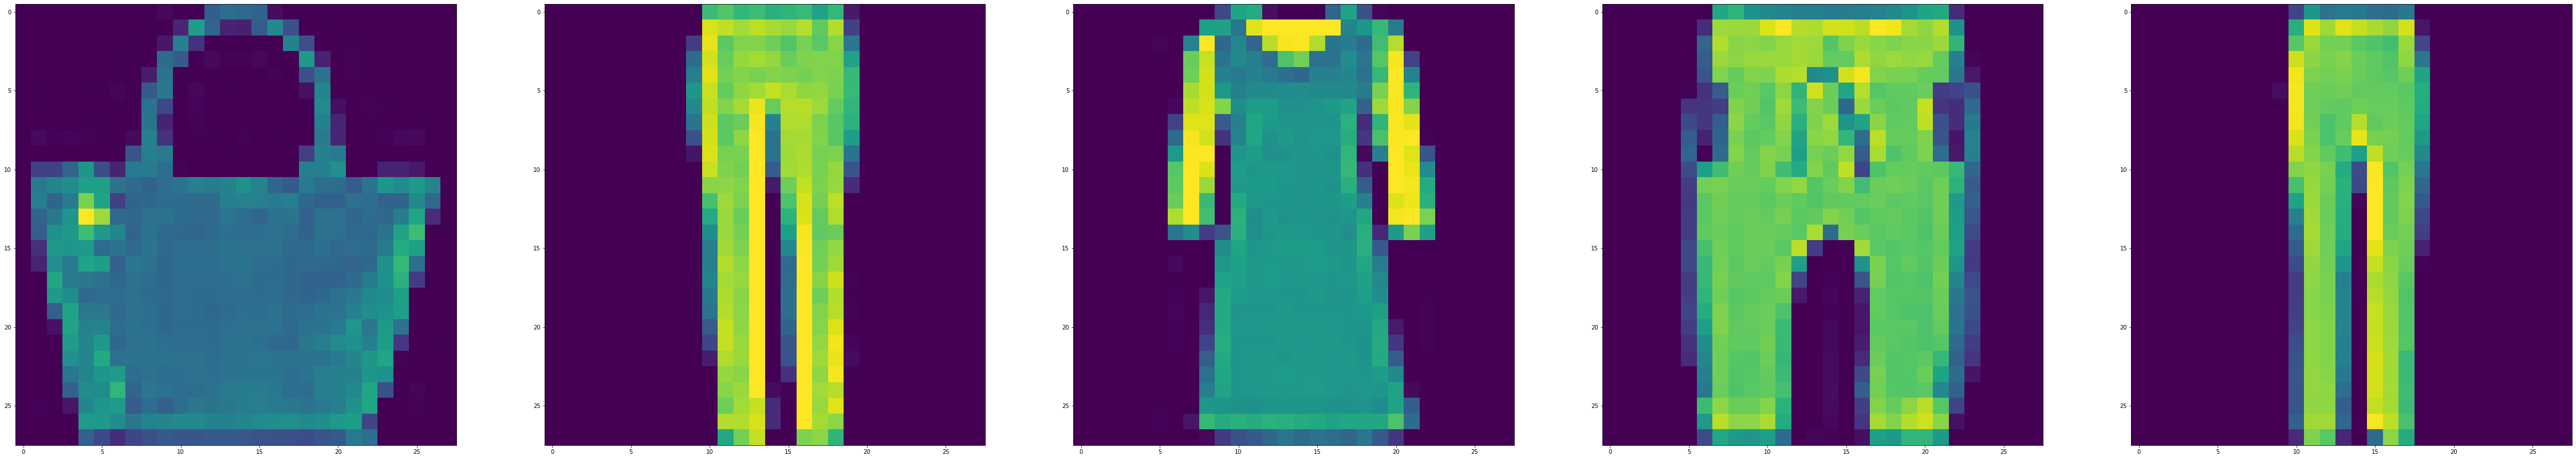

In [11]:
from PIL import Image

f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

##### Predicted: Autoencoders Output

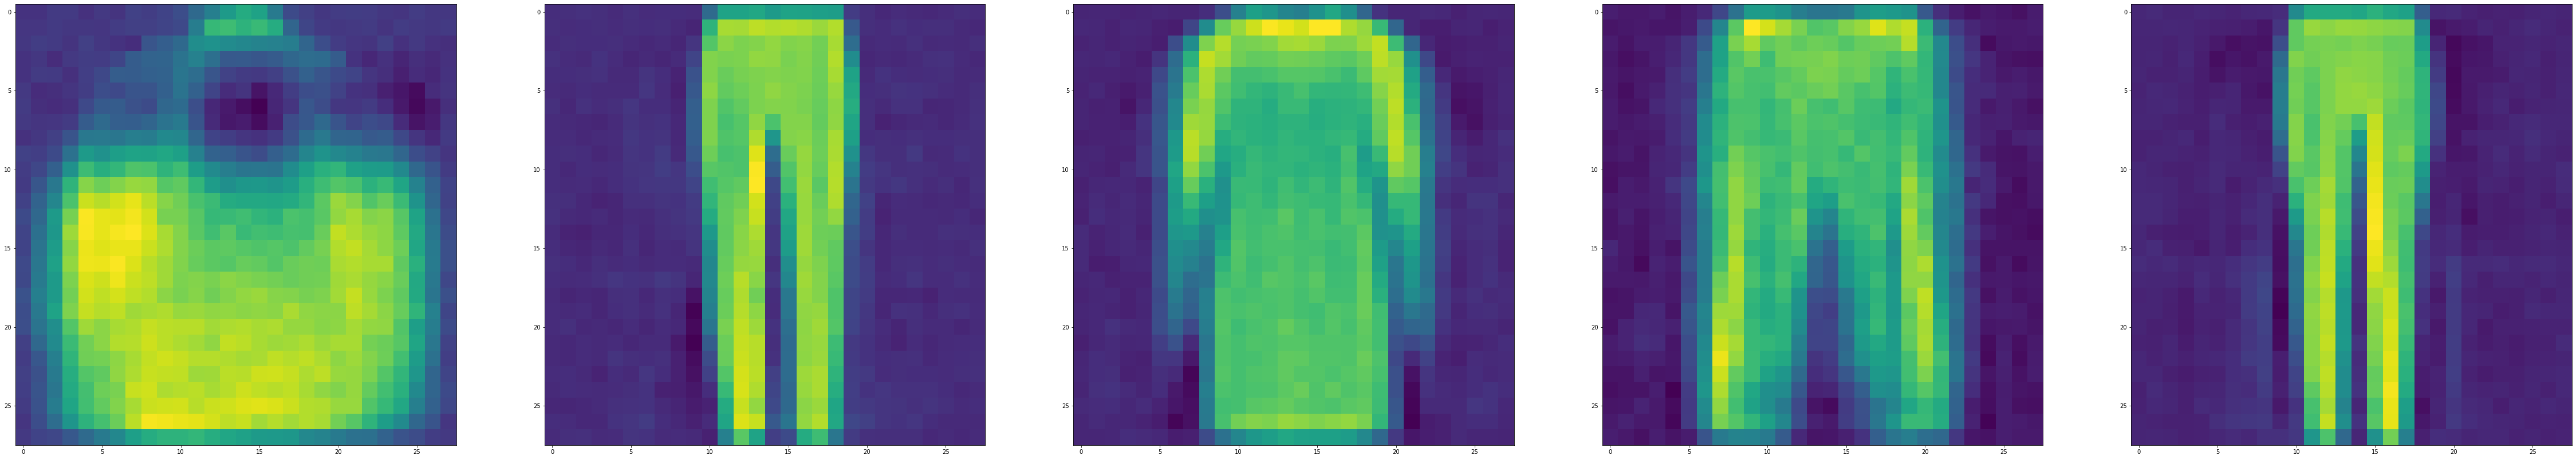

In [12]:
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

20 epochs만으로도 입력 이미지를 다시 잘 재구성하는 것을 확인할 수 있다. 이제 오토인코더로 노이즈를 없애는 예를 살펴보자.

### 2.2. UseCases 2 - Image Denoising
오토인코딩은 매우 유용하다. 이제 다른 예시를 살펴보자.

많은 경우에 입력 이미지는 노이즈를 가지고 있다. 오토인코더는 이 노이즈를 제거할 수 있다. 우선 train_x와 val_x 데이터를 이미지 픽셀과 함계 준비하자.

![mnist_number](../img/mnist_number.png)

In [13]:
# train_x와 val_x 배열 생성
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# 정규화 및 reshape
train_x = train_x/255
val_x = val_x/255

이번 오토인코더 신경망에는 합성곱계층(convolutional layer)를 추가한다. 왜냐하면 합성곱 신경망은 이미지 입력에 대해 매우 잘 작동하기 때문이다. 입력 데이터를 합성곱 신경망에 넣기 위해서는 28\*28 행렬로 변환해줘야한다.

In [14]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [15]:
train_x.shape, val_x.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

#### 2.2.1. Noisy Images
우리는 의도적으로 이미지에 노이즈를 추가할 수 있다. 이미지를 보완하는 `imgaug` 패키지를 이용하여 이미지에 노이즈를 생성할 수 있다. 노이즈에는 다음과 같은 것들이 있다:
* Salt and Pepper Noise
* Gaussian Noise
* Periodic Noise
* Speckle Noise

여기서는 impulse noise라고 불리는 Salt and Pepper Noise를 사용했다. 이 노이즈는 선명하고 갑작스러운 노이즈 즉, 희소하게 검정/흰 픽셀을 만든다.

In [16]:
# Salt and Pepper 노이즈 추가
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x*255)/255
val_x_n = seq_object.augment_images(val_x*255)/255

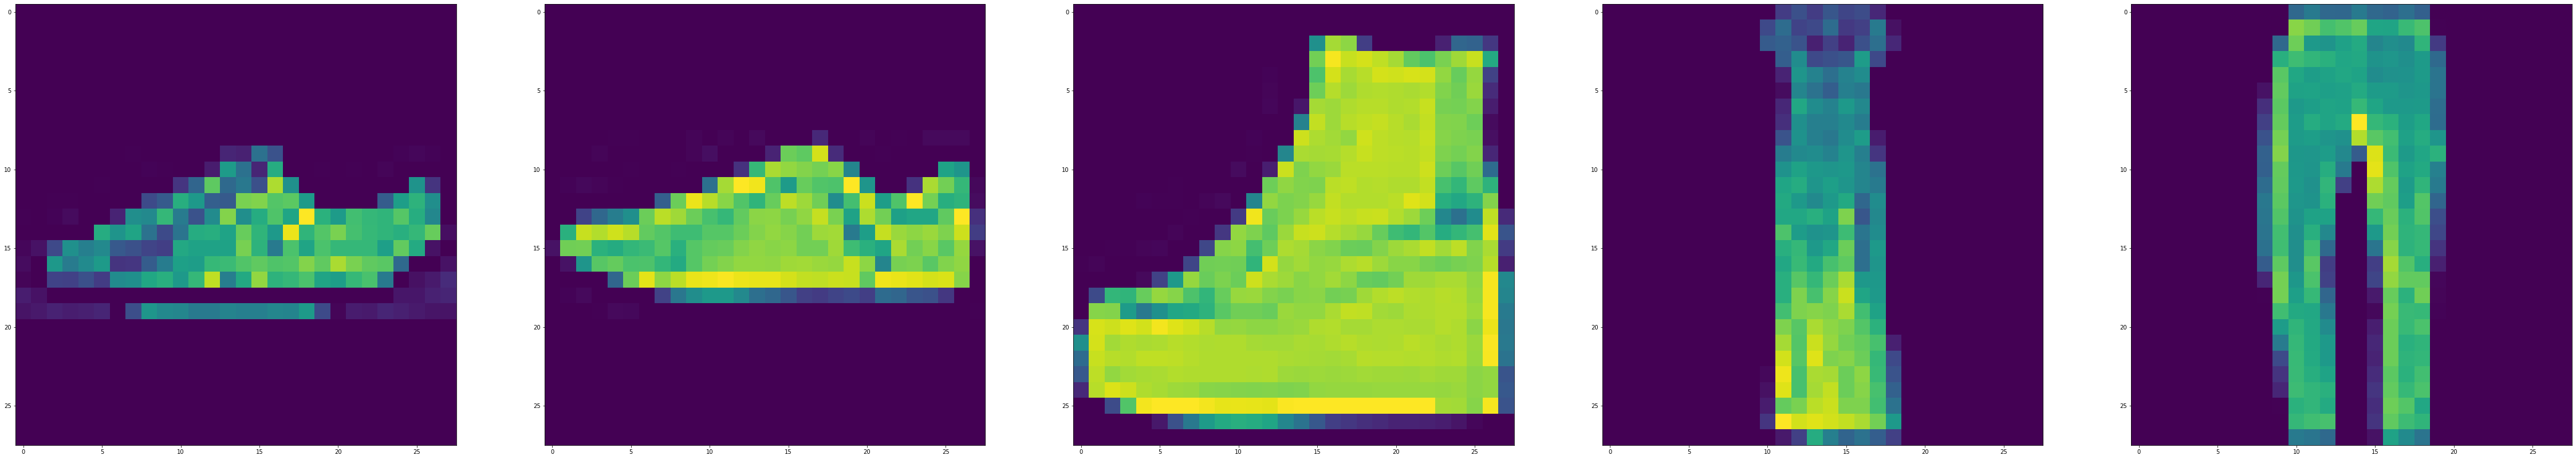

In [17]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

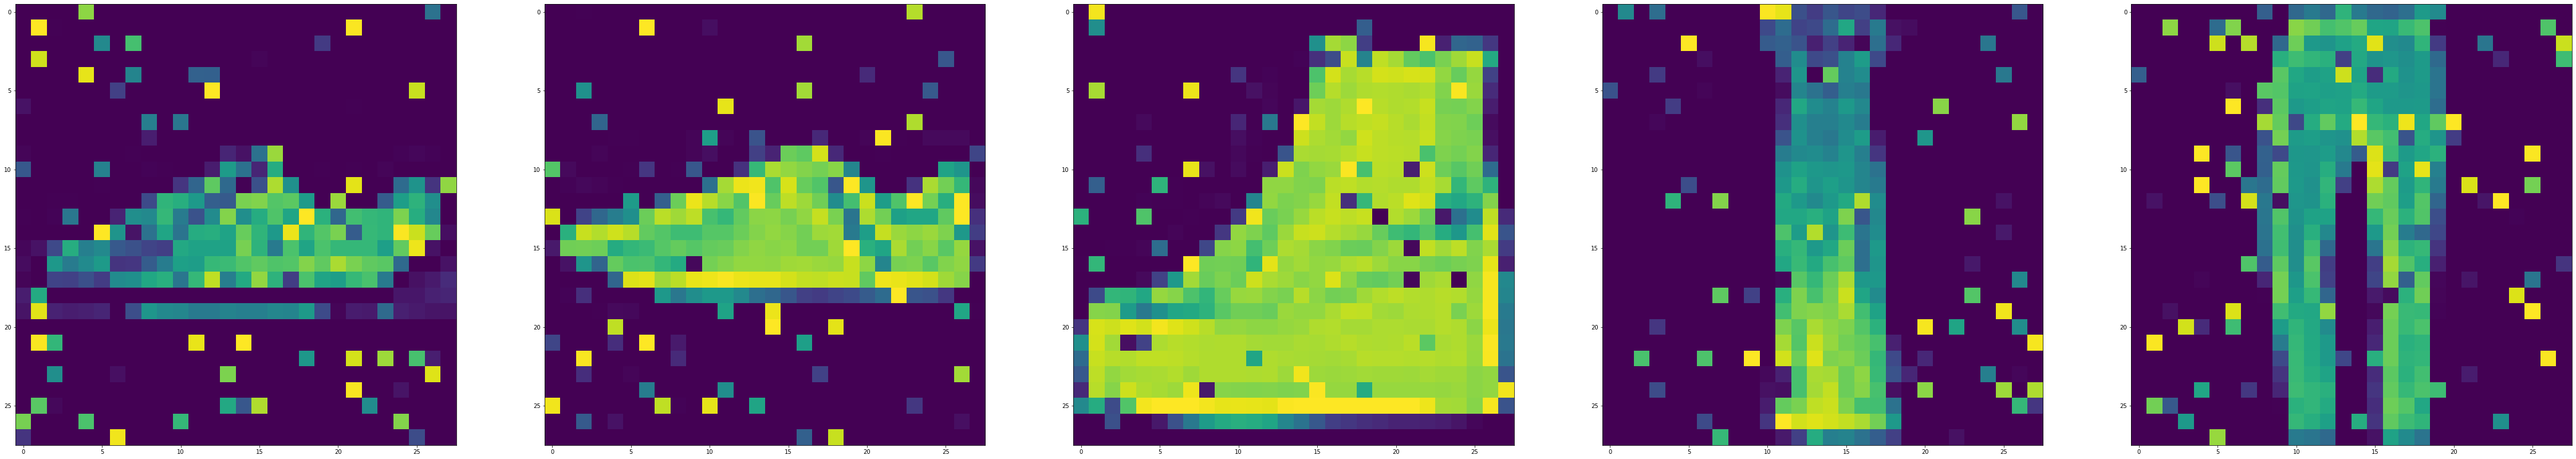

In [18]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

이제 오토인코더 모델을 만들어보자. 그 전에 어떤 종류의 네트워크가 필요한지 알아보자.

##### Encoding Architecture

인코딩 구조는 3개의 합성곱계층과 3개의 Max Pooling 계층을 하나하나 쌓아 구성된다. 활성화 함수로는 relu를 사용하고 `same` 인수로 이미지 크기를 패딩을 통해 유지할 수 있다.

Max Pooling 계층의 역할은 이미지 차원을 다운샘플링하기 위해 사용된다. 이 계층은 초기 표현의 겹치지 않은 부분 영역에 최대 필터를 적용한다.

##### Decoding Architecture

디코딩 구조에서도 거의 유사하게 3개의 합성곱계층을 사용한다. 하지만 Max Pooling 계층 3개 대신에 upsampling 계층 3개를 사용한다. 활성화 함수와 패딩은 인코딩과 동일하다.

upsampling 계층의 역할은 입력 벡터를 더 높은 차원으로 업샘플링하기 위해 사용된다. Max pooling 연산은 비가역적이지만, 각 풀링 영역 내의 최대 값의 위치를 기록함으로써 근사 역을 구할 수 있다. upsampling 계층은 이 속성을 사용하여 낮은 차원의 특징 공간에서 재구성한다.

In [23]:
# 입력층
input_layer = Input(shape=(28, 28, 1))

# 인코딩 구조
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D((2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D((2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)

# 잠재 뷰
latent_view = MaxPool2D((2, 2), padding='same')(encoded_layer3)

# 디코딩 구조
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# 모델 컴파일
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [24]:
model_2.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 16)         

이번에도 조기학습종료로 학습시켜보자. 더 좋은 결과를 얻고 싶다면 epochs 수를 더 늘리면 된다.

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=20, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 59s 2s/step - loss: 0.1027 - val_loss: 0.0568
Epoch 2/20
24/24 [==============================] - 61s 3s/step - loss: 0.0460 - val_loss: 0.0384
Epoch 3/20
24/24 [==============================] - 61s 3s/step - loss: 0.0358 - val_loss: 0.0328
Epoch 4/20
24/24 [==============================] - 60s 2s/step - loss: 0.0308 - val_loss: 0.0284
Epoch 5/20
24/24 [==============================] - 60s 3s/step - loss: 0.0273 - val_loss: 0.0257
Epoch 6/20
24/24 [==============================] - 61s 3s/step - loss: 0.0250 - val_loss: 0.0240
Epoch 7/20
24/24 [==============================] - 59s 2s/step - loss: 0.0237 - val_loss: 0.0225
Epoch 8/20
24/24 [==============================] - 62s 3s/step - loss: 0.0223 - val_loss: 0.0215
Epoch 9/20
24/24 [==============================] - 62s 3s/step - loss: 0.0215 - val_loss: 0.0207
Epoch 10/20
24/24 [==============================] - 62s 3s/step - loss: 0.0207 - val_loss: 0.0211
Epoch 11/20
24/24 [

모델 예측 결과를 검증 데이터에서 살펴보자.

##### 노이즈가 낀 검증 데이터

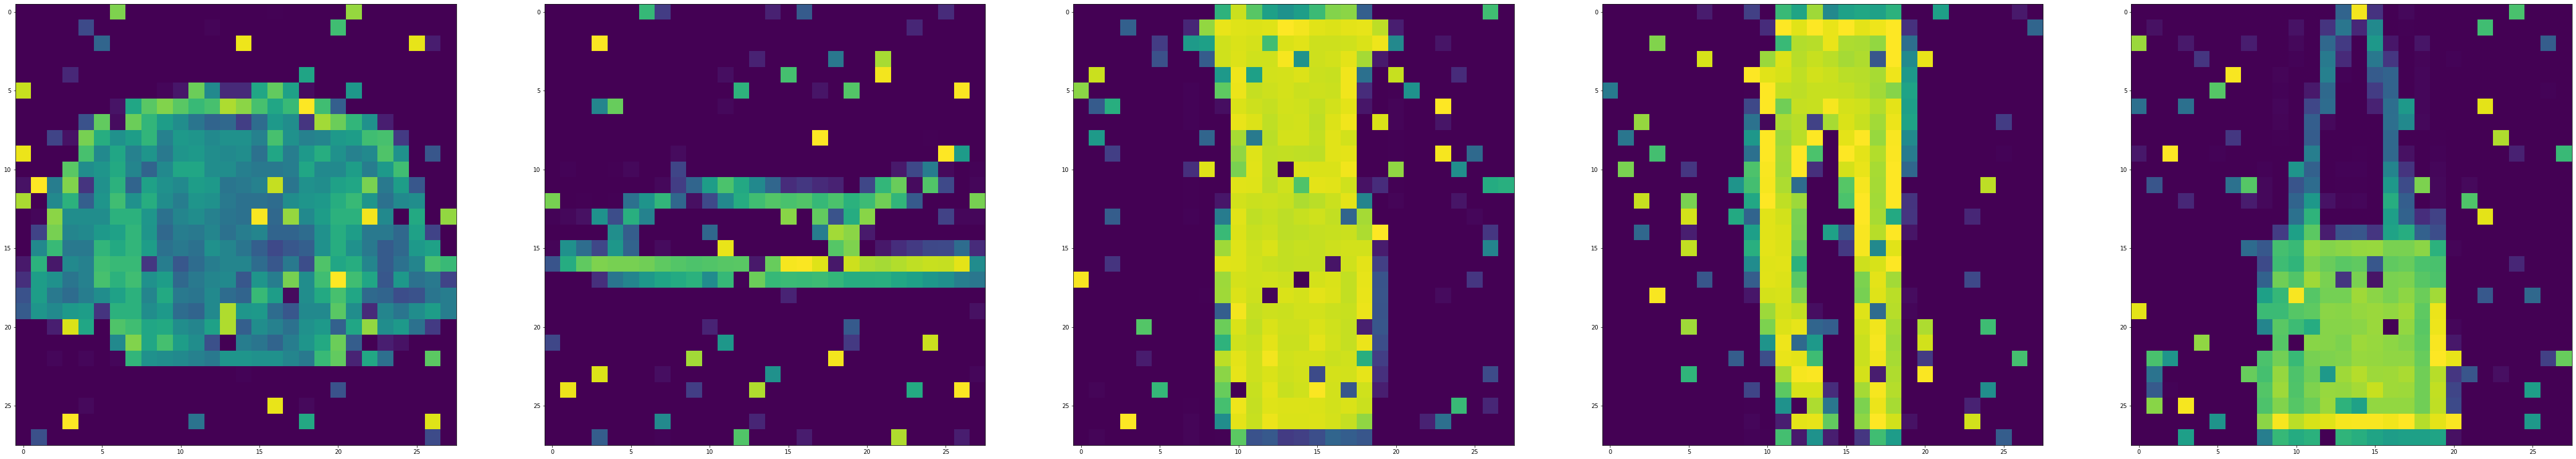

In [26]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(val_x_n[i].reshape(28, 28))
plt.show()

##### 노이즈를 없애는 오토인코딩 후 검증 데이터

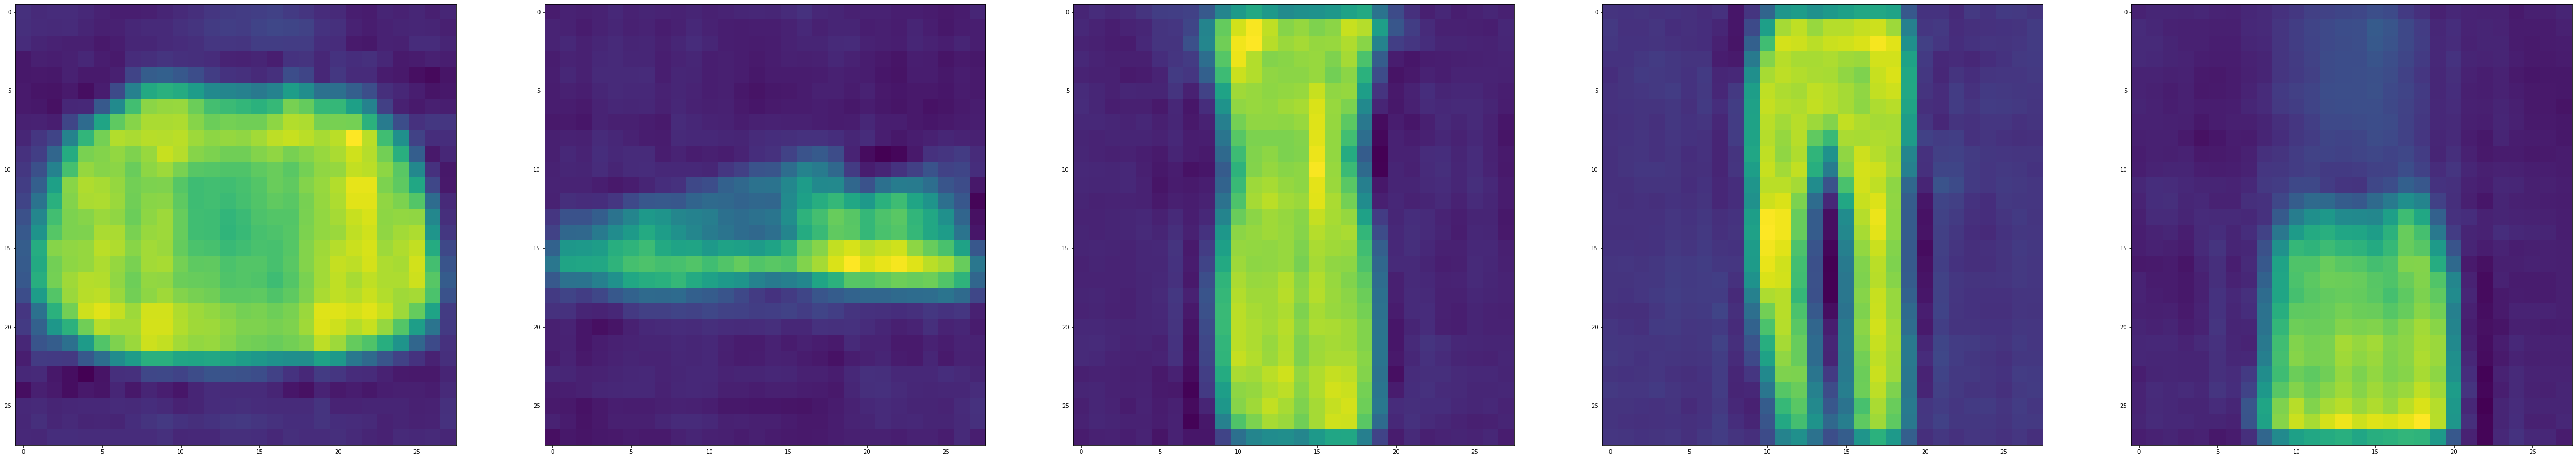

In [27]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

여기서도 적은 epochs로 시도했기 때문에 비교적 불충분한 결과가 나올 수 있지만, 500-1000 epoch 정도로 시도하면 더 좋은 결과를 얻을 수 있다.

### 2.3. UseCases 3: Sequence to Sequence Prediction using AutoEncoders

sequence-to-sequence 예측이다. 앞의 사례에서는 기본적으로 2차원 데이터였지만 sequence 데이터는 1차원 데이터이다. 이런 시퀀스 데이터의 예시에는 시계열 데이터와 문자열 데이터가 있다. 이 예시는 기계 번역 등에 적용할 수 있다. 이미지에 CNN을 사용했다면, 이 경우에선느 LSTM을 사용한다.

> 대부분의 코드는 아래의 글에서 참조 : https://machinelearningmastery.com/develop-encoder-decoder-model-sequence-sequence-prediction-keras/

#### 2.3.1. Autoencoder Architecture
이 경우의 오토인코더에서도 입력을 변환하는 인코더와 타겟으로 변환하는 디코더가 존재한다. 우선 LSTM이 이 구조에서 어떤 방식으로 작동하는지 살펴보자.

* Long Short-Term Memory, LSTM은 내부 루프로 구성된 반복적 신경망이다. (RNN)
* 다른 RNN과 다르게 backpropagation throught time, BPTT를 활용하여 효과적으로 학습하고, 기울기 소실 문제를 방지한다.
* LSTM layer에서 메모리 유닛을 정의할 수 있고, layer에 속하지 않는 각 유닛은 셀의 상태를 나타내는 c와 숨겨진 상태이자 출력인 h 등이 있다.
* 케라스를 사용하면, LSTM 레이어의 출력 상태와 LSTM 레이어의 현재 상태에 모두 접근할 수 있다.

이제 학습과 생성을 하는 오토인코더 구조를 만들어보자. 이 구조는 2가지 요소로 이루어진다.

* 시퀀스를 입력받고 LSTM의 현재 상태를 출력으로 반환하는 인코더 구조
* 시퀀스 및 인코더 LSTM 상태를 입력으로 받아 디코딩 된 출력 시퀀스를 반환하는 디코더 구조
* LSTM의 숨겨진 상태와 메모리 상태를 저장하고 (숨겨진 그리고 상태들을) 접근하므로, 보이지 않는 데이터에 대한 예측을 생성하는 동안 LSTM을 사용할 수 있다.

우선 고정 길이의 무작위 시퀀스를 포함하는 시퀀스 데이터 세트를 생성한다. 우리는 무작위 순서를 생성하는 함수를 정의할 것이다.
* X1은 난수를 포함하는 입력 시퀀스를 말한다.
* X2는 시퀀스의 다른 요소를 재생산하기 위해 시드로 사용되는 패딩된 시퀀스를 의미한다.
* y는 대사 시퀀스 또는 실제 시퀀스를 나타낸다.

![rnn1](../img/rnn1.png)
![rnn2](../img/rnn2.png)
![rnn3](../img/rnn3.png)
![rnn4](../img/rnn4.png)
![rnn5](../img/rnn5.png)
![rnn6](../img/rnn6.png)
![rnn7](../img/rnn7.png)

> 출처 : https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/05_RNN/RNN.pdf

In [28]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        # 임의의 숫자로 된 시퀀스 생성
        input_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        # 타겟 시퀀스 생성
        target = input_seq[:n_out]
        
        # 패딩된 시퀀스 / 시드 시퀀스 생성
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]
        
        # keras api를 사용해 카테고리형 변수로 변환
        X1.append(to_categorical([input_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
        
    # 불필요한 차원 제거 (중간에 있는 1같은 것)
    X1 = np.squeeze(np.array(X1), axis=1)
    X2 = np.squeeze(np.array(X2), axis=1)
    y = np.squeeze(np.array(y), axis=1)
    return X1, X2, y

In [29]:
samples = 100000
features = 51
input_size = 6
output_size = 3

In [30]:
inputs, seeds, outputs = dataset_preparation(input_size, output_size, features, samples)
print('shapes :', inputs.shape, seeds.shape, outputs.shape)
print('here is first categorically encoded input sequence looks like :')
inputs[0][0]

shapes : (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
here is first categorically encoded input sequence looks like :


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

이제 모델을 만들어보자.

In [35]:
def define_models(n_input, n_output):
    # 인코딩 구조 정의
    # 입력: 시퀀스
    # 출력: 인코딩 상태
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    
    # encoder-decoder 구조 정의
    # 입력: 시드 시퀀스
    # 출력: 디코딩 상태, 디코딩된 출력
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # 디코더 모델 정의
    # 입력: 현재 상태 + 인코딩된 시퀀스
    # 출력: 디코딩된 시퀀스
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    
    return model, encoder_model, decoder_model

In [36]:
autoencoder, encoder_model, decoder_model = define_models(features, features)

In [37]:
encoder_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None, 51)]        0         
_________________________________________________________________
lstm_3 (LSTM)                [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [38]:
decoder_model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, None, 128),  92160       input_11[0][0]                   
                                                                 input_12[0][0]       

In [39]:
autoencoder.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 128), (None, 92160       input_10[0][0]                   
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, None, 128),  92160       input_11[0][0]                   
                                                                 lstm_3[0][1]          

이제 오토인코더 모델을 Adam 알고리즘과 Categorical Cross Entropy를 손실함수로 하여 학습시켜보자.

In [41]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

3125/3125 [==============================] - 11s 3ms/step - loss: 0.6530 - acc: 0.7940


이제 입력 시퀀스를 이용해 시퀀스를 예측하는 함수를 만들어보자.

In [42]:
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [44]:
def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)
    
    current_state = encoder.predict(sequence)
    for t in range(output_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

이제 예측을 해보자.

In [47]:
for k in range(5):
    X1, X2, y = dataset_preparation(input_size, output_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence={}, SeedSequence={}, PredictedSequence={}'.format(reverse_onehot(X1[0]), 
                                                                             reverse_onehot(y[0]), 
                                                                             reverse_onehot(target)))


Input Sequence=[18, 13, 45, 42, 40, 50], SeedSequence=[45, 13, 18], PredictedSequence=[45, 13, 18]

Input Sequence=[30, 28, 20, 24, 5, 45], SeedSequence=[20, 28, 30], PredictedSequence=[20, 28, 30]

Input Sequence=[28, 40, 2, 50, 32, 27], SeedSequence=[2, 40, 28], PredictedSequence=[2, 40, 28]

Input Sequence=[1, 46, 14, 44, 6, 42], SeedSequence=[14, 46, 1], PredictedSequence=[14, 46, 1]

Input Sequence=[23, 21, 26, 6, 35, 47], SeedSequence=[26, 21, 23], PredictedSequence=[26, 21, 23]
